In [1]:
import pandas as pd
import time
df=pd.read_csv('./Airlines Reviews And Rating.csv')
df=df.drop("Users Reviews",axis=1)
df=df.fillna(0)
y=df.Recommended
df2=df.drop("Recommended",axis=1)
n=df2.select_dtypes(include='number')
c=df2.select_dtypes(exclude='number')
c=pd.get_dummies(c)
X=pd.concat([n,c],axis=1)
X=n#
X.head()

,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money
0,1.0,1.0,2.0,1.0,0.0,3.0,1
1,1.0,3.0,1.0,2.0,1.0,1.0,1
2,1.0,3.0,1.0,3.0,1.0,0.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1
4,3.0,2.0,1.0,3.0,1.0,3.0,3


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.8, random_state=42,stratify=y)

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = {'C':[2,8], 'gamma':[2,8]}
svc = SVC(kernel='rbf')
svcCV = GridSearchCV(svc,param_grid=grid,n_jobs=1,return_train_score=True, verbose=1)

In [4]:
t1=time.time()
svcCV.fit(X_train,y_train)
t2=time.time()
print(svcCV.best_score_)
print(svcCV.best_estimator_)
print(t2-t1,"s")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8419448633126745
SVC(C=2, gamma=2)
12.111919641494751 s


In [5]:
v=svcCV.best_estimator_.score(X_test,y_test)
v

0.8693009118541033

In [6]:
C=10#1
gamma=10#0.24
max_v=v
t1=time.time()
for i in range(3):
    for j in range(0,5):
        print(i,j)
        p=10**j
        for C2 in range(int(C*p-10),int(C*p+11)):
            if C2<=0:
                continue
            svc2 = SVC(kernel='rbf',C=C2/p,gamma=gamma)
            svc2.fit(X_train,y_train)
            v=svc2.score(X_test,y_test)
            if v>max_v:
                max_v=v
                C=C2/p
                print(i,j,C2/p,gamma,v)

        for gamma2 in range(int(gamma*p-10),int(gamma*p+11)):
            if gamma2<=0:
                continue
            svc2 = SVC(kernel='rbf',C=C,gamma=gamma2/p)
            svc2.fit(X_train,y_train)
            v=svc2.score(X_test,y_test)
            if v>max_v:
                max_v=v
                gamma=gamma2/p
                print(i,j,C,gamma2/p,v)
    print("iteration",i,"C",C,"gamma",gamma,"best R2:",max_v)
t2=time.time()
print(t2-t1,"s")

0 0
0 0 10 1.0 0.9103343465045592
0 1
0 1 10 0.1 0.9285714285714286
0 1 10 0.2 0.9300911854103343
0 1 10 0.3 0.9331306990881459
0 2
0 3
0 4
iteration 0 C 10 gamma 0.3 best R2: 0.9331306990881459
1 0
1 0 1.0 0.3 0.9437689969604863
1 1
1 1 0.5 0.3 0.9452887537993921
1 2
1 2 0.5 0.28 0.9468085106382979
1 3
1 4
iteration 1 C 0.5 gamma 0.28 best R2: 0.9468085106382979
2 0
2 1
2 2
2 3
2 4
iteration 2 C 0.5 gamma 0.28 best R2: 0.9468085106382979
144.93979501724243 s


In [7]:
svc2 = SVC(kernel='rbf',C=C,gamma=gamma)
svc2.fit(X_train,y_train)
print("C =",C,"gamma =",gamma,"R2 test =",svc2.score(X_test,y_test))

C = 0.5 gamma = 0.28 R2 test = 0.9468085106382979


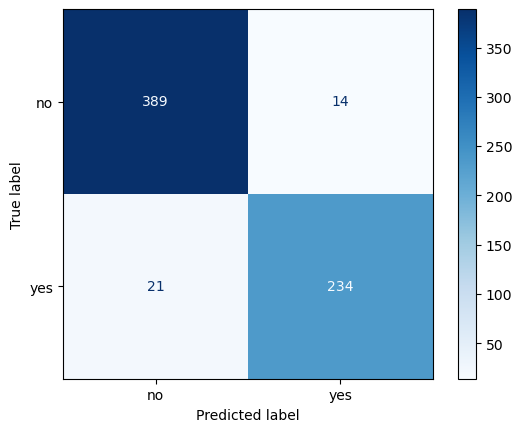

In [8]:
# C = 1.0 gamma = 0.24 R2 test = 0.939209726443769
#numerical 0.9468
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(
        svc2,
        X_test,
        y_test,
        cmap=plt.cm.Blues)

In [9]:
predictions=svc2.predict(X_test)
df.iloc[X_test[predictions!=y_test].index]

,Aircraft Type,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
2391,0,United Kingdom,Couple Leisure,EDI to LGW,Economy Class,4.0,Jan-16,4.0,1.0,4.0,0.0,0.0,4,no
1014,A321,United Kingdom,Solo Leisure,London to Athens,Economy Class,4.0,Oct-18,3.0,3.0,2.0,1.0,2.0,3,yes
2777,Boeing 747 400,South Africa,Couple Leisure,Cape Town to London,Economy Class,2.0,Jun-15,3.0,3.0,2.0,0.0,3.0,3,yes
3051,0,United Kingdom,0,0,Economy Class,3.0,0,1.0,0.0,1.0,0.0,3.0,5,yes
1505,A320,United States,Business,Athens to London Heathrow,Economy Class,3.0,Jul-17,2.0,3.0,1.0,0.0,1.0,3,yes
749,A320,United Kingdom,Family Leisure,London Heathrow to Venice Marco Polo,Economy Class,4.0,Aug-19,5.0,4.0,0.0,4.0,0.0,4,yes
1894,Boeing 787-900,United States,Solo Leisure,LHR to AUS,Business Class,2.0,Dec-16,4.0,4.0,3.0,0.0,3.0,2,yes
2190,"A320, A380",United States,Solo Leisure,BCN to SFO via LHR,First Class,5.0,Jun-16,4.0,1.0,3.0,1.0,5.0,3,no
1821,Boeing 747-400,United Kingdom,Couple Leisure,LHR to CPT,First Class,3.0,Jan-17,5.0,3.0,4.0,0.0,2.0,3,no
2362,A320,United Kingdom,Couple Leisure,LGW to NAP,Business Class,2.0,Feb-16,5.0,2.0,4.0,0.0,0.0,3,yes
